In [2]:
import scipy.stats as stats
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [38]:
# Observed frequencies (Screened vs. Unscreened)
observed = np.array([[9.202968299, 8.829595257, 7.118311242, 8.20219361
                     ],  # Screened Prevalence AAA (+)
                     [4.116927209, 2.015546365, 2.684206915, 3.164260835
                     ]])  # Unscreened Prevalence AAA (+)

# Run chi-square test
chi2, p, dof, expected = stats.chi2_contingency(observed)

print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies: {expected}")


Chi-square statistic: 0.49684599452969064
p-value: 0.919583784535488
Degrees of freedom: 3
Expected frequencies: [[9.79969318 7.97897103 7.21189369 8.36251051]
 [3.52020233 2.86617059 2.59062447 3.00394394]]


In [55]:
# Observed frequencies (Screened vs. Unscreened)
observed = np.array([[5928/64414, 685/7758, 145/2037, 172/2097
                     ],  # Screened Prevalence AAA (+)
                     [51876/1260066, 4045/200690, 1565/58304, 1826/57707
                     ]])  # Unscreened Prevalence AAA (+)

# Run chi-square test
chi2, p, dof, expected = stats.chi2_contingency(observed)

print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies: {expected}")


Chi-square statistic: 0.004968459943215539
p-value: 0.9999069954372234
Degrees of freedom: 3
Expected frequencies: [[0.09799693 0.07978971 0.07211894 0.08362511]
 [0.03520202 0.02866171 0.02590624 0.03003944]]


In [56]:
observed

array([[0.09202968, 0.08829595, 0.07118311, 0.08202194],
       [0.04116927, 0.02015546, 0.02684207, 0.03164261]])

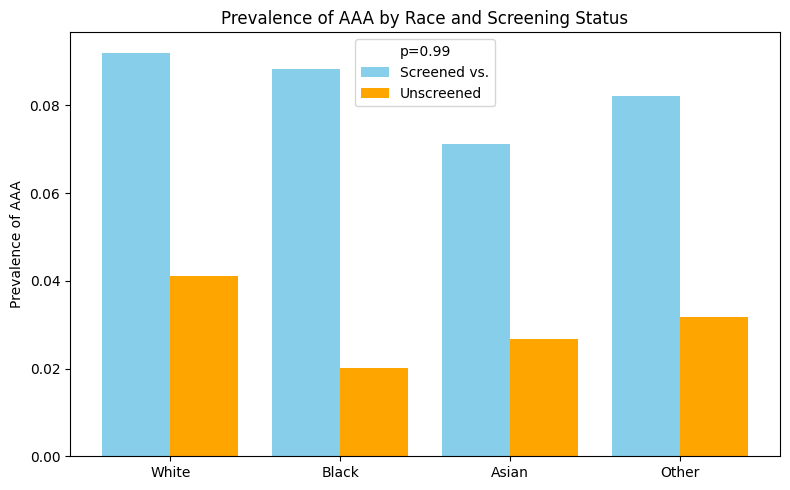

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Observed data
racial_groups = ['White', 'Black', 'Asian', 'Other']

# Define bar positions and width
x = np.arange(len(racial_groups))  # Numeric positions for groups
width = 0.4  # Width of each bar

# Create side-by-side bars
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(x - width / 2, observed[0], width, label='Screened vs.', color='skyblue')
ax.bar(x + width / 2, observed[1], width, label='Unscreened', color='orange')

# Add labels, title, and legend
ax.set_xticks(x)
ax.set_xticklabels(racial_groups)
ax.set_ylabel('Prevalence of AAA')
ax.set_title('Prevalence of AAA by Race and Screening Status')
ax.legend(title="p=0.99")

# Display the plot
plt.tight_layout()
plt.savefig("../../figure3racialdisp.png")


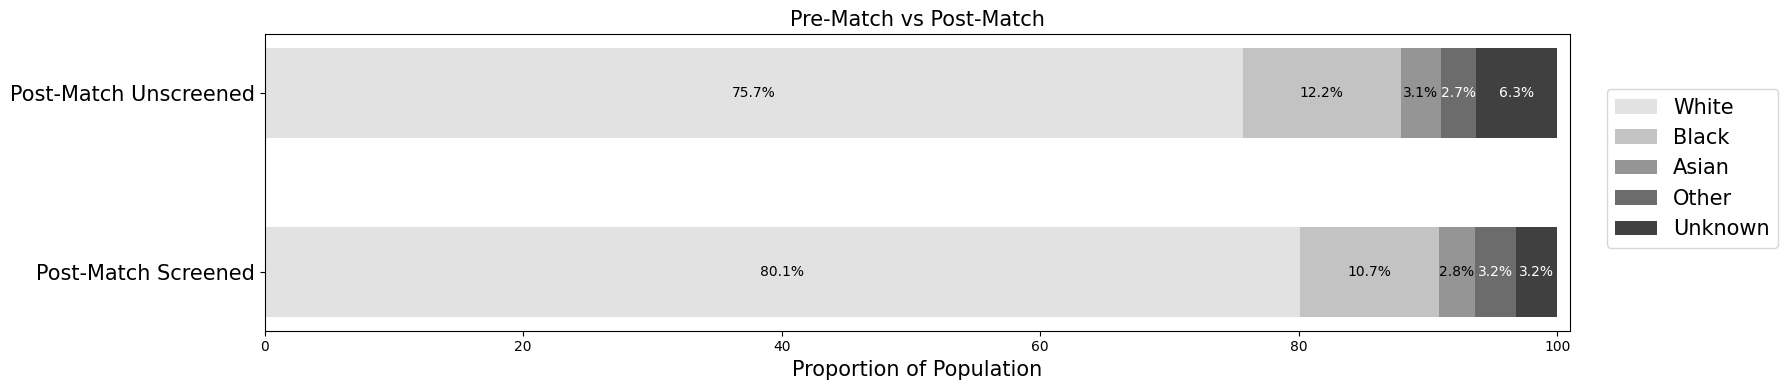

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
categories = ['White', 'Black', 'Asian', 'Other', 'Unknown']  # Racial groups
prematch = [81.32, 10.11, 2.73, 0.871]  # Pre-match values screened
prematch_un = [74.27, 11.47, 3.74, 3.42]  # Pre-match values unscreened
postmatch = [80.1, 10.74, 2.78, 3.22, 100-80.1- 10.74- 2.78- 3.22]   # Post-match values screened
postmatch_un = [75.67, 12.25, 3.08, 2.7, 100-75.67- 12.25- 3.08- 2.7 ]   # Post-match values unscreened

# Calculate cumulative sums for stacking
prematch_cumsum = np.cumsum(prematch)
prematch_un_cumsum = np.cumsum(prematch_un)
postmatch_cumsum = np.cumsum(postmatch)
postmatch_un_cumsum = np.cumsum(postmatch_un)

# Define bar widths and positions
bar_width = 0.5
x_pos = [0, 1, 2, 3]  # Position of bars (0 for Pre-Match, 1 for Post-Match)

# Define greyscale colors
greyscale_colors = plt.cm.Greys(np.linspace(0.2, 0.8, len(categories)))  # Adjust range for visibility

# Create the horizontal bar plot
fig, ax = plt.subplots(figsize=(18, 4))

# # Add stacked bars for Pre-Match
# ax.barh(x_pos[0], prematch[0], bar_width, label=categories[0], color=greyscale_colors[0])
# for i in range(1, len(prematch)):
#     ax.barh(x_pos[0], prematch[i], bar_width, left=prematch_cumsum[i - 1], color=greyscale_colors[i])

# # Add stacked bars for Pre-Match
# ax.barh(x_pos[1], prematch_un[0], bar_width, label=categories[0], color=greyscale_colors[0])
# for i in range(1, len(prematch_un)):
#     ax.barh(x_pos[1], prematch_un[i], bar_width, left=prematch_un_cumsum[i - 1], color=greyscale_colors[i])

# Add stacked bars for Post-Match
ax.barh(x_pos[2], postmatch[0], bar_width, color=greyscale_colors[0])
for i in range(1, len(postmatch)):
    ax.barh(x_pos[2], postmatch[i], bar_width, left=postmatch_cumsum[i - 1], color=greyscale_colors[i])

# Add stacked bars for Post-Match
ax.barh(x_pos[3], postmatch_un[0], bar_width, color=greyscale_colors[0])
for i in range(1, len(postmatch_un)):
    ax.barh(x_pos[3], postmatch_un[i], bar_width, left=postmatch_un_cumsum[i - 1], color=greyscale_colors[i])

# Add labels to stacked bars for Post-Match
for i, value in enumerate(postmatch):
    left = postmatch_cumsum[i - 1] if i > 0 else 0  # Left offset for the current bar
    ax.text(
        x=left + value / 2,  # Position in the center of the bar section
        y=x_pos[2],          # Vertical position of the bar
        s=f'{value:.1f}%',    # Label text, formatted to 1 decimal place
        va='center',         # Vertical alignment
        ha='center',         # Horizontal alignment
        color='white' if greyscale_colors[i][0] < 0.5 else 'black',  # Contrast text color
    )

# Add labels to stacked bars for Post-Match Unscreened
for i, value in enumerate(postmatch_un):
    left = postmatch_un_cumsum[i - 1] if i > 0 else 0  # Left offset for the current bar
    ax.text(
        x=left + value / 2,  # Position in the center of the bar section
        y=x_pos[3],          # Vertical position of the bar
        s=f'{value:.1f}%',    # Label text, formatted to 1 decimal place
        va='center',         # Vertical alignment
        ha='center',         # Horizontal alignment
        color='white' if greyscale_colors[i][0] < 0.5 else 'black',  # Contrast text color
    )


# Add labels, title, and legend
ax.set_yticks([2,3])
ax.set_yticklabels(['Post-Match Screened', 'Post-Match Unscreened'],fontsize=15)
#ax.set_ylabel('Number of Patients by Race')
ax.legend(categories, bbox_to_anchor=(1.02, .85), loc='upper left',fontsize=15)
ax.set_title('Pre-Match vs Post-Match',fontsize=15)
ax.set_xlabel("Proportion of Population",fontsize=15)
ax.set_xlim(right=101)

# Display the plot
plt.tight_layout()
plt.savefig("../../figure2racialdisp.png", dpi=300)


/var/folders/j4/ddyplt452md2_lm_qkykk0br0000gq/T/ipykernel_17125/1852887324.py:76: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(['0','10,000', '20,000', '30,000', '40,000', '50,000'], fontsize=15)  # Adjust fontsize as needed


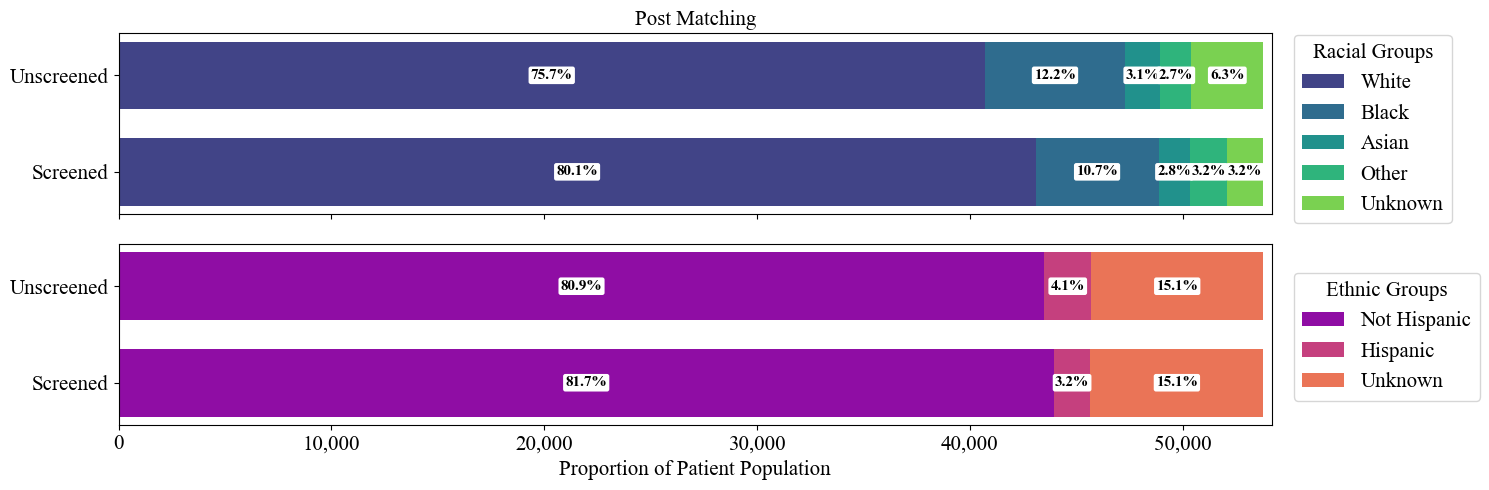

In [157]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ['White', 'Black', 'Asian', 'Other', 'Unknown']
postmatch = [80.1, 10.74, 2.78, 3.22, 100 - 80.1 - 10.74 - 2.78 - 3.22]
postmatch_un = [75.67, 12.25, 3.08, 2.7, 100 - 75.67 - 12.25 - 3.08 - 2.7]

postmatch_data = [43093, 5776, 1494, 1730, 53798-43093-5776-1494-1730]
postmatch_un_data = [40709, 6590, 1659, 1450, 53798-40709- 6590- 1659- 1450]

# Additional Data
postmatch_un_hispanic = [80.88, 4.07, 15.05]
postmatch_hispanic = [81.69, 3.2, 15.11]
postmatch_hispanic_data = [43948, 1720, 53798-1720- 43948]
postmatch_un_hispanic_data = [43509, 2189, 53798- 2189- 43509]
hispanic_labels = ['Not Hispanic', 'Hispanic', 'Unknown']

# General settings
bar_width = 0.7
x_pos = [0, 1, 2, 3]
greyscale_colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(categories)))
greyscale_colors_hisp = plt.cm.plasma(np.linspace(0.3, 1, len(categories)))

# Create plot
plt.rcParams['font.family'] = 'Times New Roman'
fig, axes = plt.subplots(2, 1, figsize=(15, 5))
ax1, ax2 = axes

# Helper function to add stacked bars and labels
def add_stacked_bars(ax, data, tags, cumsum, x_index, color, labels):
    for i, value in enumerate(data):
        left = cumsum[i - 1] if i > 0 else 0
        ax.barh(x_index, value, bar_width, left=left, color=color[i])
        # ax.text(left + value / 2, x_index, f' {value:.1f}%\n', va='center', ha='center',
        #             color='white' if color[i][0] < 0.3 else 'black',fontsize=12, fontweight='bold')
        ax.text(
        left + value / 2,  # x-coordinate
        x_index,           # y-coordinate
        f'{tags[i]:.1f}%',  # Text
        va='center',       # Vertical alignment
        ha='center',       # Horizontal alignment
        color='black',  # Text color
        fontsize=11,       # Font size
        fontweight='bold', # Font weight
        bbox=dict(
            facecolor='white',  # Background color of the box
            edgecolor='none',   # No border for the box
            boxstyle='round,pad=0.15'  # Rounded corners and padding
        )
    )

# Add main plot
postmatch_cumsum = np.cumsum(postmatch_data)
postmatch_un_cumsum = np.cumsum(postmatch_un_data)
add_stacked_bars(ax1, postmatch_data, postmatch, postmatch_cumsum, x_pos[2], greyscale_colors, categories)
add_stacked_bars(ax1, postmatch_un_data, postmatch_un, postmatch_un_cumsum, x_pos[3], greyscale_colors, categories)

postmatch_cumsum = np.cumsum(postmatch_hispanic_data)
postmatch_un_cumsum = np.cumsum(postmatch_un_hispanic_data)
add_stacked_bars(ax2, postmatch_hispanic_data, postmatch_hispanic, postmatch_cumsum, x_pos[2], greyscale_colors_hisp, hispanic_labels)
add_stacked_bars(ax2, postmatch_un_hispanic_data, postmatch_un_hispanic, postmatch_un_cumsum, x_pos[3], greyscale_colors_hisp, hispanic_labels)

# Main plot settings
ax1.set_yticks([2, 3])
ax1.set_yticklabels(['Screened', 'Unscreened'], fontsize=15)
ax1.set_xticklabels([])
ax1.legend(categories, title="Racial Groups", bbox_to_anchor=(1.01, 1.05), loc='upper left', title_fontsize=15, fontsize=15)
ax1.set_title('Post Matching', fontsize=15)


# Main plot 2 settings
ax2.set_yticks([2, 3])
ax2.set_yticklabels(['Screened', 'Unscreened'], fontsize=15)
ax2.legend(hispanic_labels, title="Ethnic Groups", bbox_to_anchor=(1.01, 0.9), loc='upper left', title_fontsize=15, fontsize=15)
ax2.set_xticklabels(['0','10,000', '20,000', '30,000', '40,000', '50,000'], fontsize=15)  # Adjust fontsize as needed
ax2.set_xlabel("Proportion of Patient Population", fontsize=15)
ax2.set_xlim(right=54200)
ax1.set_xlim(right=54200)

# Adjust layout and save
plt.tight_layout()
plt.savefig("../../figure2racialdispfinalpat.png", dpi=300)


In [89]:
pwd

'/Users/piperfrances/Downloads/Medical Research/Vascular'

In [3]:

# Example: Odds Ratios and Contingency Table Data
OR1 =  0.4791 # Odds Ratio 1: unscreened black vs. white
a1, b1, c1, d1 = 51876, 1208190, 4045, 196645  # Cell counts for OR1

OR2 = 0.9555 # Odds Ratio 2
a2, b2, c2, d2 = 5928, 58486, 685, 7073  # Cell counts for OR2

# Compute log(OR) and standard errors
lnOR1 = np.log(OR1)
SE_lnOR1 = np.sqrt(1/a1 + 1/b1 + 1/c1 + 1/d1)

lnOR2 = np.log(OR2)
SE_lnOR2 = np.sqrt(1/a2 + 1/b2 + 1/c2 + 1/d2)

# Compute Z-statistic
Z = (lnOR1 - lnOR2) / np.sqrt(SE_lnOR1**2 + SE_lnOR2**2)

# Compute p-value
p_value = 2 * (1 - norm.cdf(abs(Z)))  # Two-tailed test

# Results
print(f"Log Odds Ratio 1: {lnOR1:.3f}, SE: {SE_lnOR1:.3f}")
print(f"Log Odds Ratio 2: {lnOR2:.3f}, SE: {SE_lnOR2:.3f}")
print(f"Z-statistic: {Z:.3f}")
print(f"P-value: {p_value:.3f}")


Log Odds Ratio 1: -0.736, SE: 0.017
Log Odds Ratio 2: -0.046, SE: 0.042
Z-statistic: -15.212
P-value: 0.000


In [4]:

# Example: Odds Ratios and Contingency Table Data
OR1 =  0.6424 # Odds Ratio 1: unscreened asian vs. white
a1, b1, c1, d1 =  51876, 1208190, 1565, 56739 # Cell counts for OR1

OR2 = 0.7561 # Odds Ratio 2
a2, b2, c2, d2 =  5928, 58486, 145, 1892 # Cell counts for OR2

# Compute log(OR) and standard errors
lnOR1 = np.log(OR1)
SE_lnOR1 = np.sqrt(1/a1 + 1/b1 + 1/c1 + 1/d1)

lnOR2 = np.log(OR2)
SE_lnOR2 = np.sqrt(1/a2 + 1/b2 + 1/c2 + 1/d2)

# Compute Z-statistic
Z = (lnOR1 - lnOR2) / np.sqrt(SE_lnOR1**2 + SE_lnOR2**2)

# Compute p-value
p_value = 2 * (1 - norm.cdf(abs(Z)))  # Two-tailed test

# Results
print(f"Log Odds Ratio 1: {lnOR1:.3f}, SE: {SE_lnOR1:.3f}")
print(f"Log Odds Ratio 2: {lnOR2:.3f}, SE: {SE_lnOR2:.3f}")
print(f"Z-statistic: {Z:.3f}")
print(f"P-value: {p_value:.3f}")


Log Odds Ratio 1: -0.443, SE: 0.026
Log Odds Ratio 2: -0.280, SE: 0.087
Z-statistic: -1.790
P-value: 0.073


In [5]:

# Example: Odds Ratios and Contingency Table Data
OR1 = 0.761 # Odds Ratio 1: unscreened other vs. white
a1, b1, c1, d1 =  51876, 1208190, 1826, 55881 # Cell counts for OR1

OR2 = 0.8815 # Odds Ratio 2
a2, b2, c2, d2 =  5928, 58486, 172, 1925 # Cell counts for OR2

# Compute log(OR) and standard errors
lnOR1 = np.log(OR1)
SE_lnOR1 = np.sqrt(1/a1 + 1/b1 + 1/c1 + 1/d1)

lnOR2 = np.log(OR2)
SE_lnOR2 = np.sqrt(1/a2 + 1/b2 + 1/c2 + 1/d2)

# Compute Z-statistic
Z = (lnOR1 - lnOR2) / np.sqrt(SE_lnOR1**2 + SE_lnOR2**2)

# Compute p-value
p_value = 2 * (1 - norm.cdf(abs(Z)))  # Two-tailed test

# Results
print(f"Log Odds Ratio 1: {lnOR1:.3f}, SE: {SE_lnOR1:.3f}")
print(f"Log Odds Ratio 2: {lnOR2:.3f}, SE: {SE_lnOR2:.3f}")
print(f"Z-statistic: {Z:.3f}")
print(f"P-value: {p_value:.3f}")


Log Odds Ratio 1: -0.273, SE: 0.024
Log Odds Ratio 2: -0.126, SE: 0.081
Z-statistic: -1.744
P-value: 0.081


In [6]:

# Example: Odds Ratios and Contingency Table Data
OR1 = 0.5508 # Odds Ratio 1: unscreened nonhispanic other vs. hispanic
a1, b1, c1, d1 = 47546, 1140267, 1961, 85384  # Cell counts for OR1

OR2 = 0.7285 # Odds Ratio 2
a2, b2, c2, d2 = 6229, 60442, 169, 2251 # Cell counts for OR2

# Compute log(OR) and standard errors
lnOR1 = np.log(OR1)
SE_lnOR1 = np.sqrt(1/a1 + 1/b1 + 1/c1 + 1/d1)

lnOR2 = np.log(OR2)
SE_lnOR2 = np.sqrt(1/a2 + 1/b2 + 1/c2 + 1/d2)

# Compute Z-statistic
Z = (lnOR1 - lnOR2) / np.sqrt(SE_lnOR1**2 + SE_lnOR2**2)

# Compute p-value
p_value = 2 * (1 - norm.cdf(abs(Z)))  # Two-tailed test

# Results
print(f"Log Odds Ratio 1: {lnOR1:.3f}, SE: {SE_lnOR1:.3f}")
print(f"Log Odds Ratio 2: {lnOR2:.3f}, SE: {SE_lnOR2:.3f}")
print(f"Z-statistic: {Z:.3f}")
print(f"P-value: {p_value:.3f}")


Log Odds Ratio 1: -0.596, SE: 0.023
Log Odds Ratio 2: -0.317, SE: 0.081
Z-statistic: -3.323
P-value: 0.001


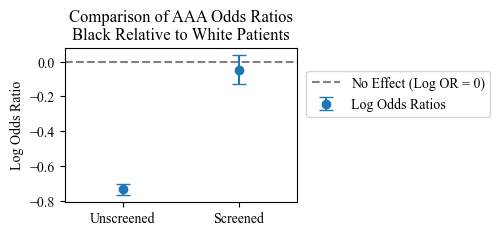

In [180]:
import matplotlib.pyplot as plt
import numpy as np

# Data
groups = ["Unscreened", "Screened"]
log_odds_ratios = [-0.736, -0.046]
errors = [0.017, 0.042]  # Standard errors

# Plot
plt.figure(figsize=(3, 2))
plt.xlim(left=-0.5, right=1.5)
plt.errorbar(groups, log_odds_ratios, yerr=[1.96 * np.array(errors)], fmt='o', capsize=5, label="Log Odds Ratios")
plt.axhline(0, color='gray', linestyle='--', label='No Effect (Log OR = 0)')
plt.ylabel("Log Odds Ratio")
plt.title("Comparison of AAA Odds Ratios\nBlack Relative to White Patients")
plt.legend(bbox_to_anchor=(1.01, 0.9), loc='upper left',)
plt.show()


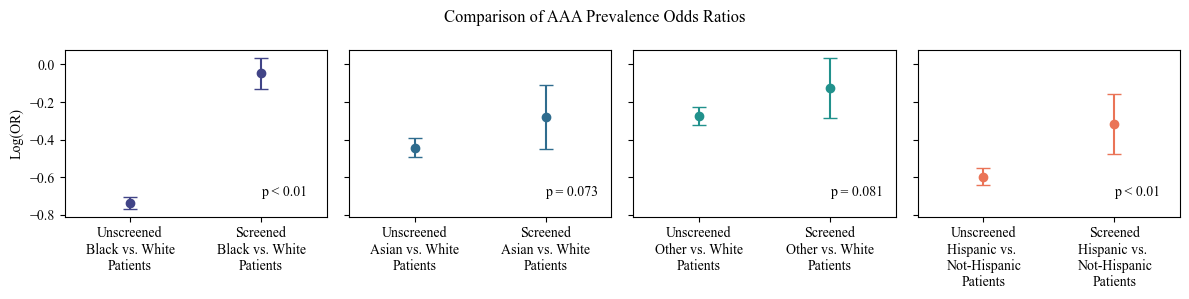

In [227]:
import matplotlib.pyplot as plt
import numpy as np

# Data for first comparison
groups1 = ["Unscreened\nBlack vs. White\nPatients", "Screened\nBlack vs. White\nPatients"]
log_odds_ratios1 = [-0.736, -0.046]
errors1 = [0.017, 0.042]

# Data for second comparison
groups2 = ["Unscreened\nHispanic vs. \nNot-Hispanic\nPatients", "Screened\nHispanic vs. \nNot-Hispanic\nPatients"]
log_odds_ratios2 = [np.log(0.5508), np.log(0.7285)]
errors2 = [
    np.sqrt(1/47546 + 1/1140267 + 1/1961 + 1/85384),
    np.sqrt(1/6229 + 1/60442 + 1/169 + 1/2251),
]

# Plot
fig, axs = plt.subplots(1, 4, figsize=(12, 3), sharey=True)

# Left subplot: White vs. Black
axs[0].errorbar(groups1, log_odds_ratios1, yerr=[1.96 * np.array(errors1)], fmt='o', capsize=5, label="Log(OR)",color=plt.cm.viridis(np.linspace(0.2, 0.8, len(categories)))[0])
axs[0].set_ylabel("Log(OR)")
axs[0].set_xlim(left=-0.5, right=1.5)
axs[0].text(1,-0.7,"p < 0.01")

errors3 = [0.026, 0.087]

# Right subplot: Non-Hispanic vs. Hispanic
axs[1].errorbar(["Unscreened\nAsian vs. White\nPatients", "Screened\nAsian vs. White\nPatients"],
                [-0.443, -0.280], yerr=[1.96 * np.array(errors3)], fmt='o', capsize=5, label="Log(OR)",color=plt.cm.viridis(np.linspace(0.2, 0.8, len(categories)))[1])
axs[1].set_xlim(left=-0.5, right=1.5)
axs[1].text(1,-0.7,"p = 0.073")

errors4 = [0.024, 0.081]
# Right subplot: Non-Hispanic vs. Hispanic
axs[2].errorbar(["Unscreened\nOther vs. White\nPatients", "Screened\nOther vs. White\nPatients"],
                [-0.273, -0.126], yerr=[1.96 * np.array(errors4)], fmt='o', capsize=5, label="Log(OR)",color=plt.cm.viridis(np.linspace(0.2, 0.8, len(categories)))[2])
axs[2].set_xlim(left=-0.5, right=1.5)
axs[2].text(1,-0.7,"p = 0.081")


# Right subplot: Non-Hispanic vs. Hispanic
axs[3].errorbar(groups2, log_odds_ratios2, yerr=[1.96 * np.array(errors2)], fmt='o', capsize=5, label="Log(OR)",color=plt.cm.plasma(np.linspace(0.3, 1, len(categories)))[2])
axs[3].set_xlim(left=-0.5, right=1.5)
axs[3].text(1,-0.7,"p < 0.01")

plt.suptitle("Comparison of AAA Prevalence Odds Ratios")

# Layout adjustments
plt.tight_layout()
plt.savefig("../../figure3racialdispfinalpat.png", dpi=300)
plt.show()
